In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_excel("D:/Data Science Capstone/Project 2/health care diabetes1.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
#To find null values. No Null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
#Status of Patient
#500- Has Diabetes , 268- No Diabetes
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

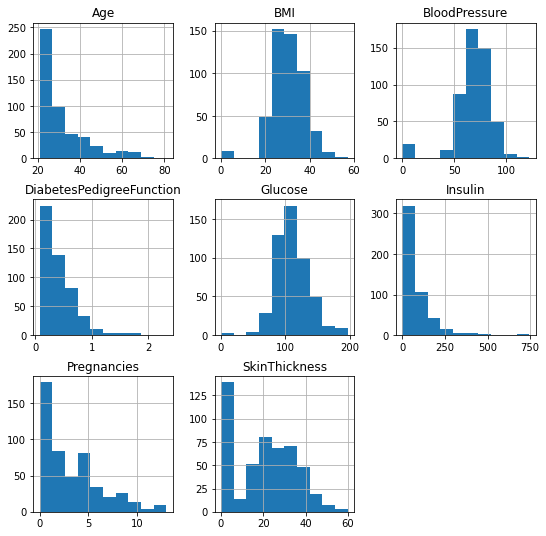

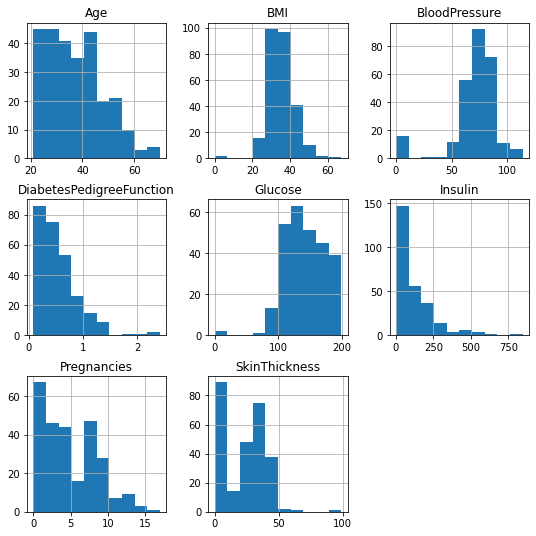

In [8]:
#Visualize Diabetes Patients using Histogram
df.groupby('Outcome').hist(figsize=(9,9))

<function matplotlib.pyplot.show(*args, **kw)>

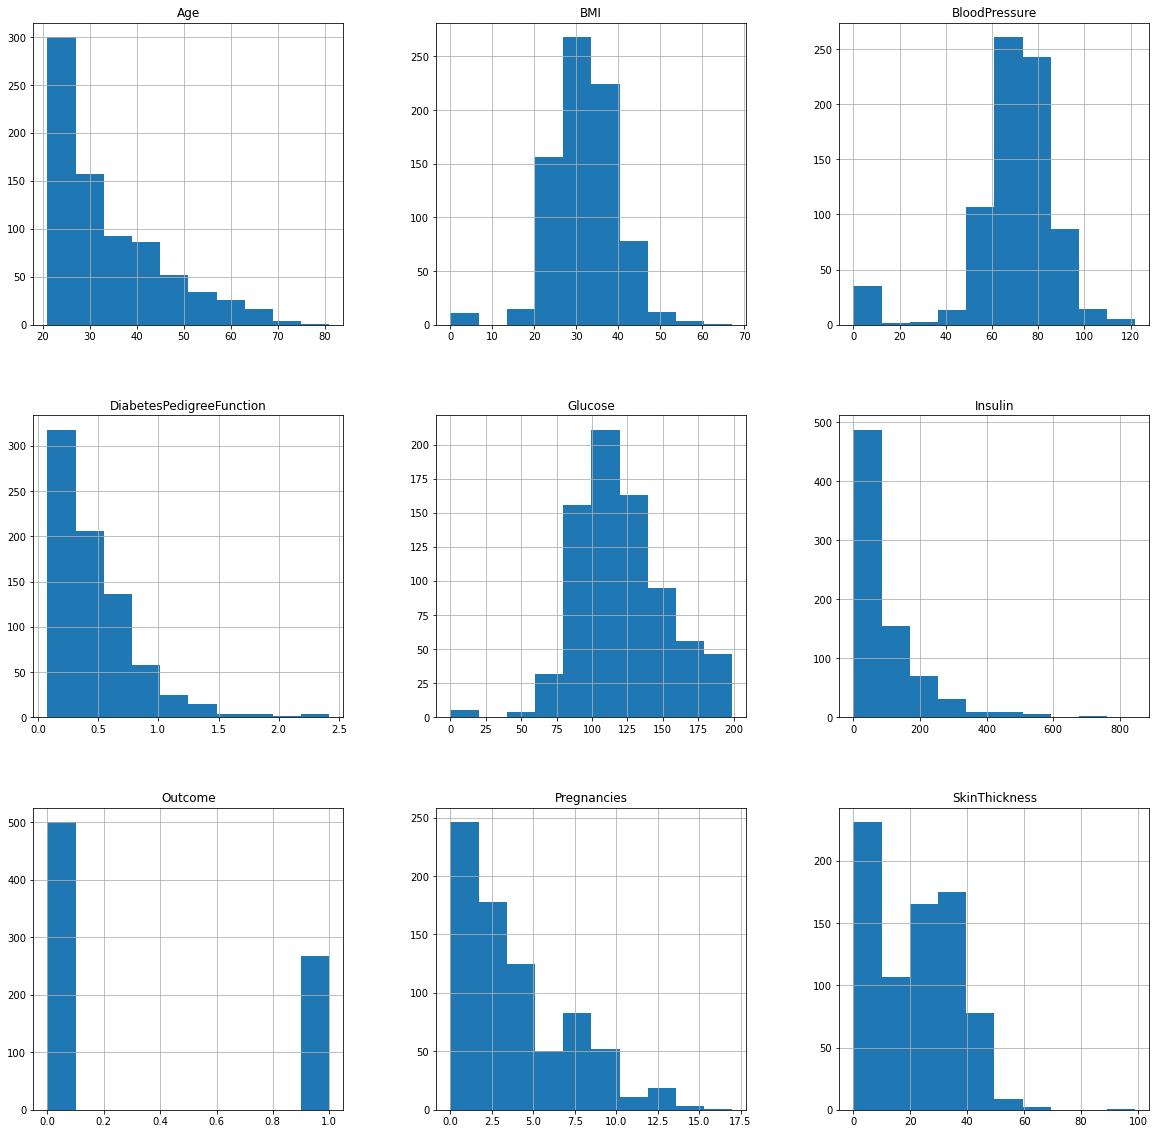

In [10]:
import matplotlib.pyplot as plt
df.hist(bins=10,figsize=(20,20))
plt.show
#Conclusions
#The maximum age is between 20 and 30 yrs.
#BMI is maximum at 25 yrs
#Glucose is maximum  between 100 and 125  .
#Insulin is maximum  between 0 and 100 
#Non hypertension people:225000 approx


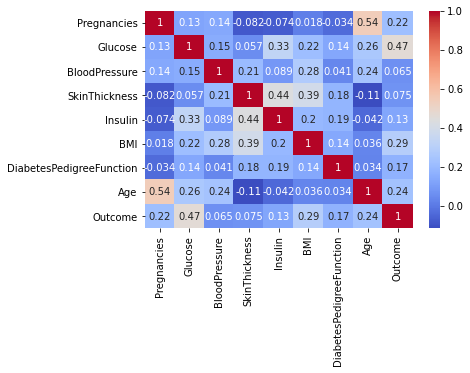

In [11]:
#Heatmap to find correlation
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
#Pregnancies, Glucose, BMI, Insulin and Age have  correlation with Diabetes
#.We will select these features

In [12]:
#Remove Outliers using IQR

Q1 = df.quantile(0.25) #25 percentile
Q3 = df.quantile(0.75) #75 percentile

IQR = Q3-Q1
#Outliers would be outside 25 and 75 percentile
df_out = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

df_out.shape
#Removed 129 records

(639, 9)

In [13]:
# Selecting features - [Glucose,Pregnancies, Insulin, BMI, Age]
X = df_out.iloc[:, [1, 4, 5, 7]].values
y = df_out.iloc[:, 8].values

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
columns = df_out.iloc[:,-1]
X = pd.DataFrame(X1)

In [32]:
X.head(10)

,0,1,2,3
0,0.991351,-0.829247,0.247974,1.561132
1,-1.170674,-0.829247,-0.840853,-0.154912
2,2.192476,-0.829247,-1.354158,-0.064594
3,-1.033403,0.353035,-0.607533,-1.058093
4,-0.106820,-0.829247,-0.996400,-0.245230
5,-1.410899,0.277571,-0.156447,-0.606502
6,-0.312728,-0.829247,0.870161,-0.245230
7,1.677708,-0.829247,0.932380,0.116043
8,1.609073,1.371811,-0.965291,1.651450
9,-0.038185,2.063572,2.145645,-0.154912


In [15]:
from sklearn.model_selection import train_test_split
train_data_x,test_data_x,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf = LogisticRegression()
#Fit the model
clf.fit(train_data_x,train_y)
#Predict model
y_pred = clf.predict(test_data_x)

ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#Find ROC AUC Curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)


print("\nAccuracy {0} ROC {1}".format(ac,rc))
#Cross Val Score
result = cross_val_score(estimator=clf,X=train_X,Y=train_y,scoring='accuracy',cv=10)
display_result(result)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Accuracy 0.8515625 ROC 0.790937019969278


NameError: name 'cross_val_score' is not defined

In [29]:
#SVM
from sklearn.svm import SVC


clf = SVC(kernel='linear')
#Fit the model
clf.fit(train_data_x,train_y)
#Predict model
y_pred = clf.predict(test_data_x)
#Fit the model
#Predict model

ac = accuracy_score(test_y,y_pred)
acc.append(ac)


#Find ROC AUC Curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)

print("Accuracy\n{0}".format(ac))
print("ROC{0}".format(rc))

#Cross Val Score
result = cross_validate(clf,train_data_x,train_y,scoring=scoring,cv=10)
display_result(result)

Accuracy
0.796875
ROC0.745894554883319


NameError: name 'scoring' is not defined

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

#10 cluster neighbors
clf = KNeighborsClassifier(n_neighbors=10)
#Fit the model
clf.fit(train_data_x,train_y)
#Predict model
y_pred = clf.predict(test_data_x)

ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#Find ROC AUC Curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)

print("Accuracy\n{0}".format(ac))
print("ROC{0}".format(rc))

#Cross Val Score
result = cross_validate(clf,train_data_x,train_y,scoring=scoring,cv=10)
display_result(result)

Accuracy
0.7734375
ROC0.692626728110599


NameError: name 'scoring' is not defined

In [38]:
#RAndom Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_data_x,train_y)
#Predict model
y_pred = clf.predict(test_data_x)

ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#Find ROC AUC Curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)

print("Accuracy\n{0}".format(ac))
print("ROC{0}".format(rc))

#Cross Val Score
result = cross_validate(clf,train_data_x,train_data_y,scoring=scoring,cv=10)
display_result(result)

Accuracy
0.7421875
ROC0.6942650477912685


C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: name 'train_data_y' is not defined

In [18]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

#Fit the model
clf.fit(train_data_x,train_y)
#Predict model
y_pred = clf.predict(test_data_x)

ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#Find ROC AUC Curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)

print("Accuracy\n{0}".format(ac))
print("ROC{0}".format(rc))

#Cross Val Score
result = cross_validate(clf,train_data_x,train_y,scoring=scoring,cv=10)
display_result(result)

Accuracy
0.828125
ROC0.7837173579109064


NameError: name 'scoring' is not defined